<a href="https://colab.research.google.com/github/AnjaliTakale/Deep-Learning/blob/main/1_Regression_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 - Data Ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


##Target - PE - Power Output in MegaWatts
1. AT - Atmospheric Temperature in Degree Celsius
2. V - Vacuum Pressure of Boiler
3. AP - Atmospheric Pressure
4. RH - Relative Humidity in Percentage

## Step 2 - Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [6]:
df.duplicated().sum()

41

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


In [8]:
df.shape

(9527, 5)

## Step 3 - Seperate X and Y(PE)

In [13]:
X = df.drop(columns=["PE"])
Y = df["PE"]

In [14]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [15]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4 - Apply  Preprocessing on X

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")


In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Step 5 - Apply Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [21]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [22]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [23]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [24]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [25]:
xtrain.shape

(7621, 4)

In [26]:
xtest.shape

(1906, 4)

## Step 6 - Build Neural Network

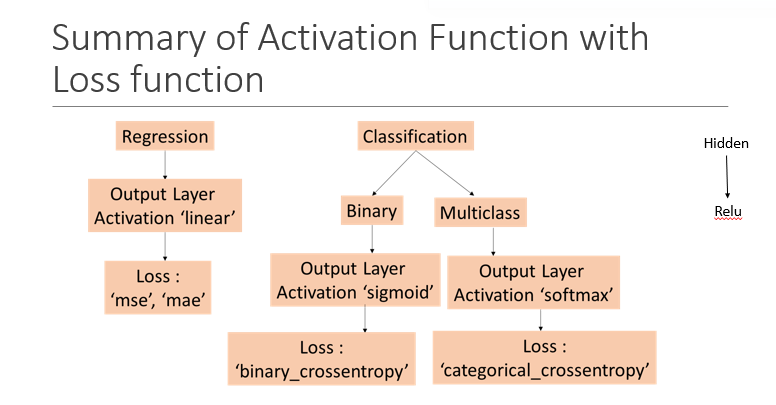

In [27]:
xtrain.shape[1]

4

In [28]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [29]:
# Initialize neural network
model = Sequential()

# Add Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add hidden layer
model.add(Dense(units=8, activation='relu'))

# Add output layer
model.add(Dense(units=4, activation="relu"))

# Output layer
model.add(Dense(units=1, activation="linear"))

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [33]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 205873.5625 - mae: 453.4165 - val_loss: 202533.1562 - val_mae: 449.7084
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 200933.0781 - mae: 447.9185 - val_loss: 187579.3906 - val_mae: 432.6994
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182003.7188 - mae: 426.0878 - val_loss: 153153.4219 - val_mae: 390.4342
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 143282.3594 - mae: 377.0276 - val_loss: 103897.4844 - val_mae: 319.0792
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93250.0469 - mae: 300.3744 - val_loss: 57000.3359 - val_mae: 227.4888
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50285.8516 - mae: 209.9327 - val_loss: 28678.5488 - val_mae: 148.0274
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26622.7227 - mae: 141.6909 - val_loss: 18056.1523 - val_mae: 114.1218
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17475.7402 - 

## Plot the Learning Curve

In [35]:
import matplotlib.pyplot as plt

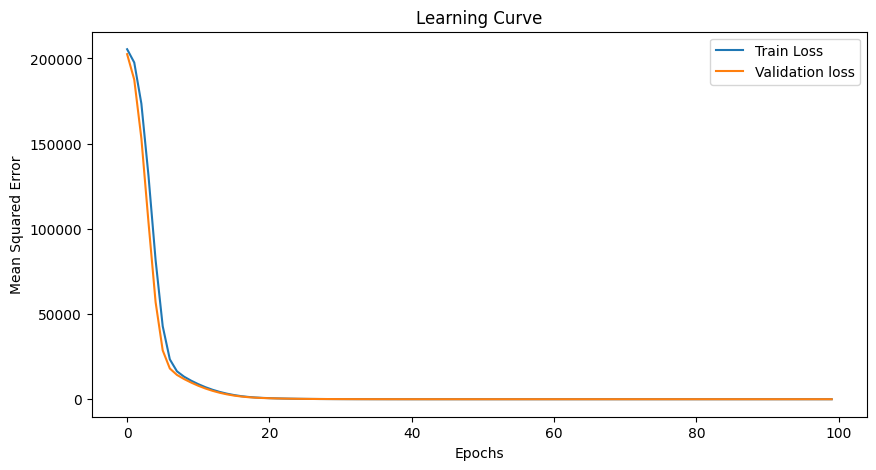

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Evaluate the Model

In [39]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.9044 - mae: 3.6429


[21.905481338500977, 3.6242098808288574]

In [40]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.1347 - mae: 3.5214


[21.676557540893555, 3.609039306640625]

In [41]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [42]:
ypred_train[0:5]

array([[451.8611 ],
       [479.6211 ],
       [469.51642],
       [429.64883],
       [468.21097]], dtype=float32)

In [43]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [45]:
ypred_test[0:5]

array([[424.6371 ],
       [482.16257],
       [483.78793],
       [449.9955 ],
       [446.86288]], dtype=float32)

In [46]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(ytrain, ypred_train)

0.9237871089336742

In [49]:
r2_score(ytest, ypred_test)

0.9281732949900207

## From above i conclude that model is ood and can be used for out of sample prediction

## Step 8 - Out of Sample Prediction

In [50]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [51]:
xnew = pd.read_csv(url2)
xnew

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97
...,...,...,...,...
95,26.35,69.48,1008.45,70.47
96,11.78,39.96,1011.37,82.95
97,5.62,41.38,1020.91,86.21
98,24.96,74.99,1008.25,80.52


In [52]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [53]:
xnew_pre = num_pipe.fit_transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.427011,0.406243,-0.567574,0.798624
1,1.326264,0.087032,-0.974534,-2.089095
2,1.186943,1.575060,-1.899298,0.850257
3,0.877341,0.685654,-0.306296,-0.032746
4,-1.026710,-1.056606,1.975528,-0.265470
...,...,...,...,...
95,0.970222,1.272093,-0.770262,-0.302885
96,-1.080186,-1.125646,-0.307880,0.631003
97,-1.947071,-1.010308,1.202779,0.874951
98,0.774610,1.719639,-0.801932,0.449164


In [54]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[443.94516],
       [436.42062],
       [426.42123],
       [437.88602],
       [476.13693]], dtype=float32)

In [55]:
xnew["PE_pred"] = preds.round(2)

In [56]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,443.950012
1,28.88,54.89,1007.16,46.60,436.420013
2,27.89,73.21,1001.32,85.88,426.420013
3,25.69,62.26,1011.38,74.08,437.890015
4,12.16,40.81,1025.79,70.97,476.140015
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,434.149994
96,11.78,39.96,1011.37,82.95,473.059998
97,5.62,41.38,1020.91,86.21,486.820007
98,24.96,74.99,1008.25,80.52,433.950012


In [57]:
xnew.to_csv("Results.csv", index=False)

## Save the model object

In [58]:
model.save("PowerModel.keras")

## Load the Model

In [59]:
from keras.models import load_model

In [60]:
m = load_model("/content/PowerModel.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)